In [2]:
import requests
from datetime import datetime
import numpy as np

def fetch_solar_radiation(lat, lon):
    # Obtener la fecha actual
    day = datetime.now().strftime('%d')
    month = datetime.now().strftime('%m')
    year = datetime.now().strftime('%Y')
    start_date = '20240401'
    end_date = datetime.now().strftime('%Y%m%d')
    
    # Construir la URL de la API con los parámetros necesarios
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point?parameters=ALLSKY_SFC_SW_DWN&community=RE&longitude={lon}&latitude={lat}&format=JSON&start={start_date}&end={end_date}"
    
    # Realizar la solicitud a la API
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        # Extraer la radiación solar promedio diaria
        solar_radiation = data['properties']['parameter']['ALLSKY_SFC_SW_DWN']
        return solar_radiation
    else:
        print("Error fetching data from NASA POWER API")
        return None

# Ejemplo de uso
latitude = 25.6802019  # Latitud de ejemplo
longitude = -100.315258  # Longitud de ejemplo
solar_radiation_data = fetch_solar_radiation(latitude, longitude)
print(solar_radiation_data)


{'20240401': 3.51, '20240402': 7.14, '20240403': 7.4, '20240404': 7.41, '20240405': 7.51, '20240406': 7.23, '20240407': 6.5, '20240408': 5.95, '20240409': 7.46, '20240410': 7.78, '20240411': 7.6, '20240412': 6.57, '20240413': 6.4, '20240414': 7.38, '20240415': 5.61, '20240416': 4.7, '20240417': 5.73, '20240418': 3.45, '20240419': 6.06, '20240420': 7.33, '20240421': 3.02, '20240422': 2.97, '20240423': 6.07, '20240424': 6.76, '20240425': 6.94, '20240426': 7.77, '20240427': 8.0, '20240428': 7.82, '20240429': 6.92, '20240430': 6.56, '20240501': 7.12, '20240502': 7.14, '20240503': 6.56, '20240504': 4.89, '20240505': 7.45, '20240506': 7.47, '20240507': 5.96, '20240508': 7.52, '20240509': 7.23, '20240510': 6.94, '20240511': 5.24, '20240512': 7.19, '20240513': 7.24, '20240514': 7.68, '20240515': 6.63, '20240516': 7.03, '20240517': 6.13, '20240518': 7.84, '20240519': 7.87, '20240520': 7.73, '20240521': 6.96, '20240522': 7.59, '20240523': 7.75, '20240524': 7.88, '20240525': 7.34, '20240526': 7.7

In [11]:
# Filtración de valores
filtered_data = {k: v for k, v in solar_radiation_data.items() if v != -999.0}
sorted_data = sorted(filtered_data.items())
last_15_measurements = sorted_data[-15:] # Se obtienen las últimas 15 mediciones
last_15_values = [value for date, value in last_15_measurements]
# Promedio
average = sum(last_15_values) / len(last_15_values)

print(f"El promedio de las últimas dos semanas es: {average:.2f} kW/m2")

El promedio de las últimas dos semanas es: 6.82 kW/m2


### Evolución de radiación solar durante un día 

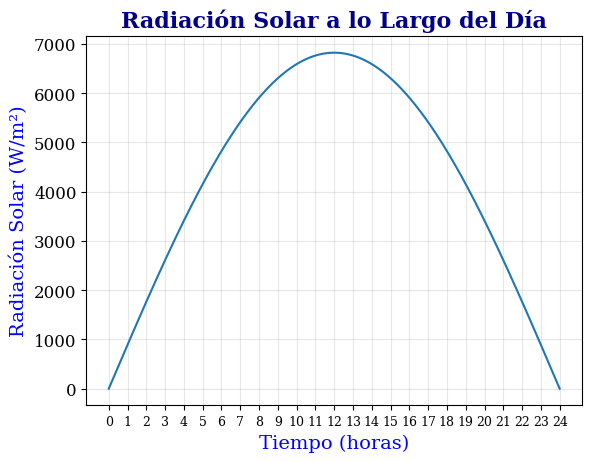

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
G_max = average*1000  # Radiación solar máxima en W/m²
T = 86400  # Periodo de un día en segundos

# Función de radiación solar
def solar_radiation(t, G_max):
    return G_max * np.sin(np.pi * t / T)

# Tiempo en segundos para un día completo
time_seconds = np.arange(0, 24*60*60, 1)

# Radiación solar a lo largo del día
G_values = solar_radiation(time_seconds, G_max)

# Convertir tiempo en segundos a horas para la gráfica
time_hours = time_seconds / 3600

# Crear la gráfica
plt.plot(time_hours, G_values)

# Cambiar la tipografía
plt.xlabel("Tiempo (horas)", fontdict={'family': 'serif', 'color': 'blue', 'size': 14})
plt.ylabel("Radiación Solar (W/m²)", fontdict={'family': 'serif', 'color': 'blue', 'size': 14})
plt.title("Radiación Solar a lo Largo del Día", fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16})

# Personalizar los ticks del eje x
plt.xticks(np.arange(0, 25, 1), fontname='serif', fontsize=9, color='black')
plt.yticks(fontname='serif', fontsize=12, color='black')

# Mostrar la cuadrícula
plt.grid(alpha=0.3)

# Mostrar la gráfica
plt.show()


### Modelo matemático completo

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Propiedades del agua y del cobre en unidades SI
c_agua = 4180  # J/(kg·K)
c_cobre = 385  # J/(kg·K)
k_cobre = 385  # W/(m·K)  # Conductividad térmica del cobre
h = 500  # W/(m²·K) -> Depende de las condiciones del fluido
h_ambiental = 50  # Coeficiente de transferencia de calor al ambiente (W/(m²·K))

# Parámetros geométricos y condiciones iniciales en unidades SI
r_cobre = 0.006  # Radio del cobre en m
l_cobre = 1.4  # Longitud total del cobre en m
A_contacto = 2 * np.pi * r_cobre * l_cobre  # Área de contacto en m²
d_cobre = 0.05  # Espesor del cobre en m
m_agua = 5  # Masa del agua en kg
m_cobre = 1  # Masa del cobre en kg
T_agua_inicial = 293.15  # Temperatura inicial del agua en K (20 °C)
T_cobre_inicial = 288.15  # Temperatura inicial del cobre en K (15 °C)
T_ambiental = 293.15  # Temperatura ambiental en K (20 °C)
#G_max = 7000  # Radiación solar máxima en W/m² (valor realista)
efficiency = 0.05  # Eficiencia del colector solar
A_colector = 0.5  # Área del colector en m²
time_seconds = np.arange(0, 24 * 60 * 60, 1)  # Simulación de 24 horas con intervalos de 1 segundo
time_step = 1  # Intervalo de tiempo en segundos (1 segundo)

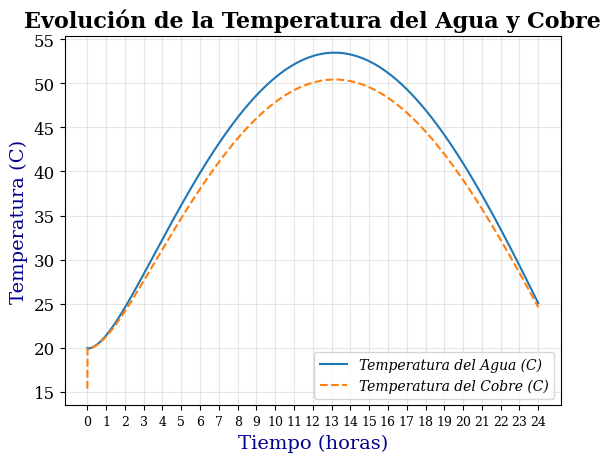

In [15]:
# Función para simular la temperatura
def simulate_temperature(time_seconds, G_max, efficiency, A_contacto, d_cobre, m_agua, c_agua, m_cobre, c_cobre, T_ambiental):
    T_agua = T_agua_inicial
    T_cobre = T_cobre_inicial
    temperatures_agua = []
    temperatures_cobre = []
    G_tf = []
    
    for t in time_seconds:
        # Radiación solar en el tiempo t
        G_t = solar_radiation(t, G_max)
    
        # Incremento de temperatura del agua por radiación solar
        delta_T_agua_solar = (G_t * A_colector * efficiency * time_step) / (m_agua * c_agua)

        # Transferencia de calor del agua al cobre 
        Q_agua_cobre = (h * A_contacto * (T_agua - T_cobre) * time_step) # Convección
        # Ecuación de Fourier
        #Q_agua_cobre = (k_cobre * A_contacto * (T_agua - T_cobre) * time_step)/ d_cobre # Convección

        # Pérdida de calor al ambiente (para agua y cobre)
        Q_agua_ambiental = h_ambiental * A_contacto * (T_agua - T_ambiental) * time_step
        Q_cobre_ambiental = h_ambiental * A_contacto * (T_cobre - T_ambiental) * time_step

        # Actualización de la temperatura del agua y del cobre
        delta_T_agua_conduccion = Q_agua_cobre / (m_agua * c_agua)
        delta_T_cobre_conduccion = Q_agua_cobre / (m_cobre * c_cobre)

        delta_T_agua_enfriamiento = Q_agua_ambiental / (m_agua * c_agua)
        delta_T_cobre_enfriamiento = Q_cobre_ambiental / (m_cobre * c_cobre)

        T_agua -= delta_T_agua_conduccion + delta_T_agua_enfriamiento
        T_cobre += delta_T_cobre_conduccion - delta_T_cobre_enfriamiento

        # Incrementar la temperatura del agua por radiación solar
        T_agua += delta_T_agua_solar

        # Almacenar temperaturas
        temperatures_agua.append(T_agua)
        temperatures_cobre.append(T_cobre)
        G_tf.append(G_t)

    return temperatures_agua, temperatures_cobre, G_tf

# Simulación de 24 horas con intervalos de 1 segundo
temperatures_agua, temperatures_cobre, G_tf = simulate_temperature(time_seconds, G_max, efficiency, A_contacto, d_cobre, m_agua, c_agua, m_cobre, c_cobre, T_ambiental)
temperaturas_agua_C = [temp - 273.15 for temp in temperatures_agua]
temperaturas_cobre_C = [temp - 273.15 for temp in temperatures_cobre]
# Segundos a horas -> Gráfica
time_hours = time_seconds / 3600

plt.plot(time_hours, temperaturas_agua_C, label="Temperatura del Agua (C)")
plt.plot(time_hours, temperaturas_cobre_C, label="Temperatura del Cobre (C)", linestyle="--")
plt.xlabel("Tiempo (horas)", fontdict={'family': 'serif', 'color': 'darkblue', 'size': 14})
plt.ylabel("Temperatura (C)", fontdict={'family': 'serif', 'color': 'darkblue', 'size': 14})
plt.title("Evolución de la Temperatura del Agua y Cobre", fontdict={'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 16})
plt.legend(prop={'family': 'serif', 'style': 'italic', 'size': 10})
plt.grid(alpha = 0.3)
plt.xticks(np.arange(0, 25, 1), fontname='serif', fontsize=9, color='black')  # Establecer ticks del eje x para cada hora
plt.yticks(fontname='serif', fontsize=12, color='black')
plt.show()

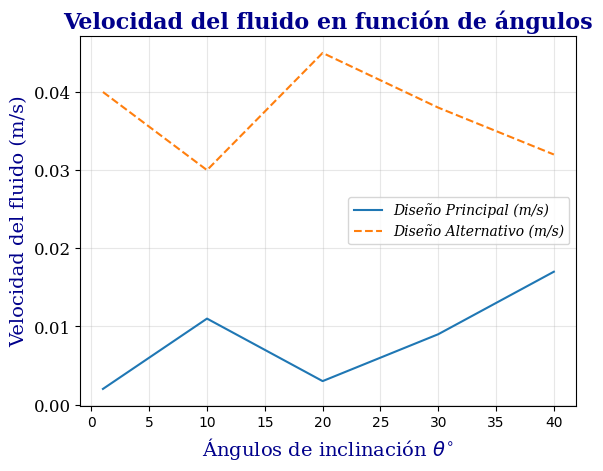

In [8]:
# Valores de la columna "Ángulo de inclinación"
import matplotlib.pyplot as plt
angulos_inclinacion = [1, 10, 20, 30, 40]

# Valores de la columna "Modelo Base Velocidad (m/s)"
modelo_base_velocidad = [0.002, 0.011, 0.003, 0.009, 0.017]

# Valores de la columna "Modelo Alterno Velocidad (m/s)"
modelo_alterno_velocidad = [0.04, 0.03, 0.045, 0.038, 0.032]


plt.plot(angulos_inclinacion, modelo_base_velocidad, label="Diseño Principal (m/s)")
plt.plot(angulos_inclinacion, modelo_alterno_velocidad, label="Diseño Alternativo (m/s)", linestyle="--")
plt.xlabel(r'Ángulos de inclinación $\theta^{\circ}$', fontdict={'family': 'serif', 'color': 'darkblue', 'size': 14})
plt.ylabel("Velocidad del fluido (m/s)", fontdict={'family': 'serif', 'color': 'darkblue', 'size': 14})
plt.title("Velocidad del fluido en función de ángulos", fontdict={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 16})
plt.legend(prop={'family': 'serif', 'style': 'italic', 'size': 10})
plt.grid(alpha = 0.3)
#plt.xticks(np.arange(0, 25, 1), fontname='serif', fontsize=9, color='black')  # Establecer ticks del eje x para cada hora
plt.yticks(fontname='serif', fontsize=12, color='black')
plt.show()
